## Treatment NULL/NAN


# 2. importing the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sweetviz as sv
import missingno as msno

%matplotlib inline

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# 3. Loading Each Dataset BRFSS 2016-2021

In [4]:
## Load Dataset bffrs
##df = pd.read_csv('E:/AI_Project/2. PhD_Dzaki_BRFSS/Fix_Model_HP/1. EDNNModel/Code/data_clean_final_fix.csv')
df = pd.read_csv('I:/My Drive/Colab Notebooks/AI_Project/2. PhD_Dzaki_BRFSS/Fix_Model_HP/1. EDNNModel/Code/data_clean_final_fix.csv')
df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X24,X25,X26,Y2,Y3,Y4,Y5,Y6,Y7,Y1
0,3.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,3.0,1.0,...,1.0,3.0,1.0,2.0,1.0,2.0,2.0,1.0,2.0,2.0
1,5.0,3.0,1.0,1.0,2.0,4.0,2.0,1.0,5.0,1.0,...,NaN,NaN,2.0,2.0,2.0,2.0,2.0,1.0,1.0,2.0
2,4.0,1.0,1.0,1.0,2.0,1.0,2.0,2.0,2.0,2.0,...,2.0,3.0,1.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0
3,4.0,1.0,1.0,1.0,2.0,4.0,2.0,1.0,1.0,1.0,...,2.0,3.0,2.0,2.0,2.0,1.0,2.0,1.0,2.0,2.0
4,2.0,1.0,1.0,3.0,1.0,3.0,1.0,1.0,1.0,1.0,...,1.0,3.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0


#  Handling Data Null


In [5]:
#Check null
df.isnull().sum()
df.isna().sum()

X1          5
X2          9
X3          1
X4        170
X5          0
X6          0
X7          0
X8          0
X9          4
X10         2
X11         2
X12        31
X13         0
X14    418866
X15         0
X16         2
X17         0
X18    470963
X19         1
X20         0
X21         0
X22         4
X23         0
X24    356863
X25    356850
X26         0
Y2          0
Y3          1
Y4          0
Y5          0
Y6          1
Y7          0
Y1          0
dtype: int64

## Perlu Treatment NULL atau NAN

<AxesSubplot: >

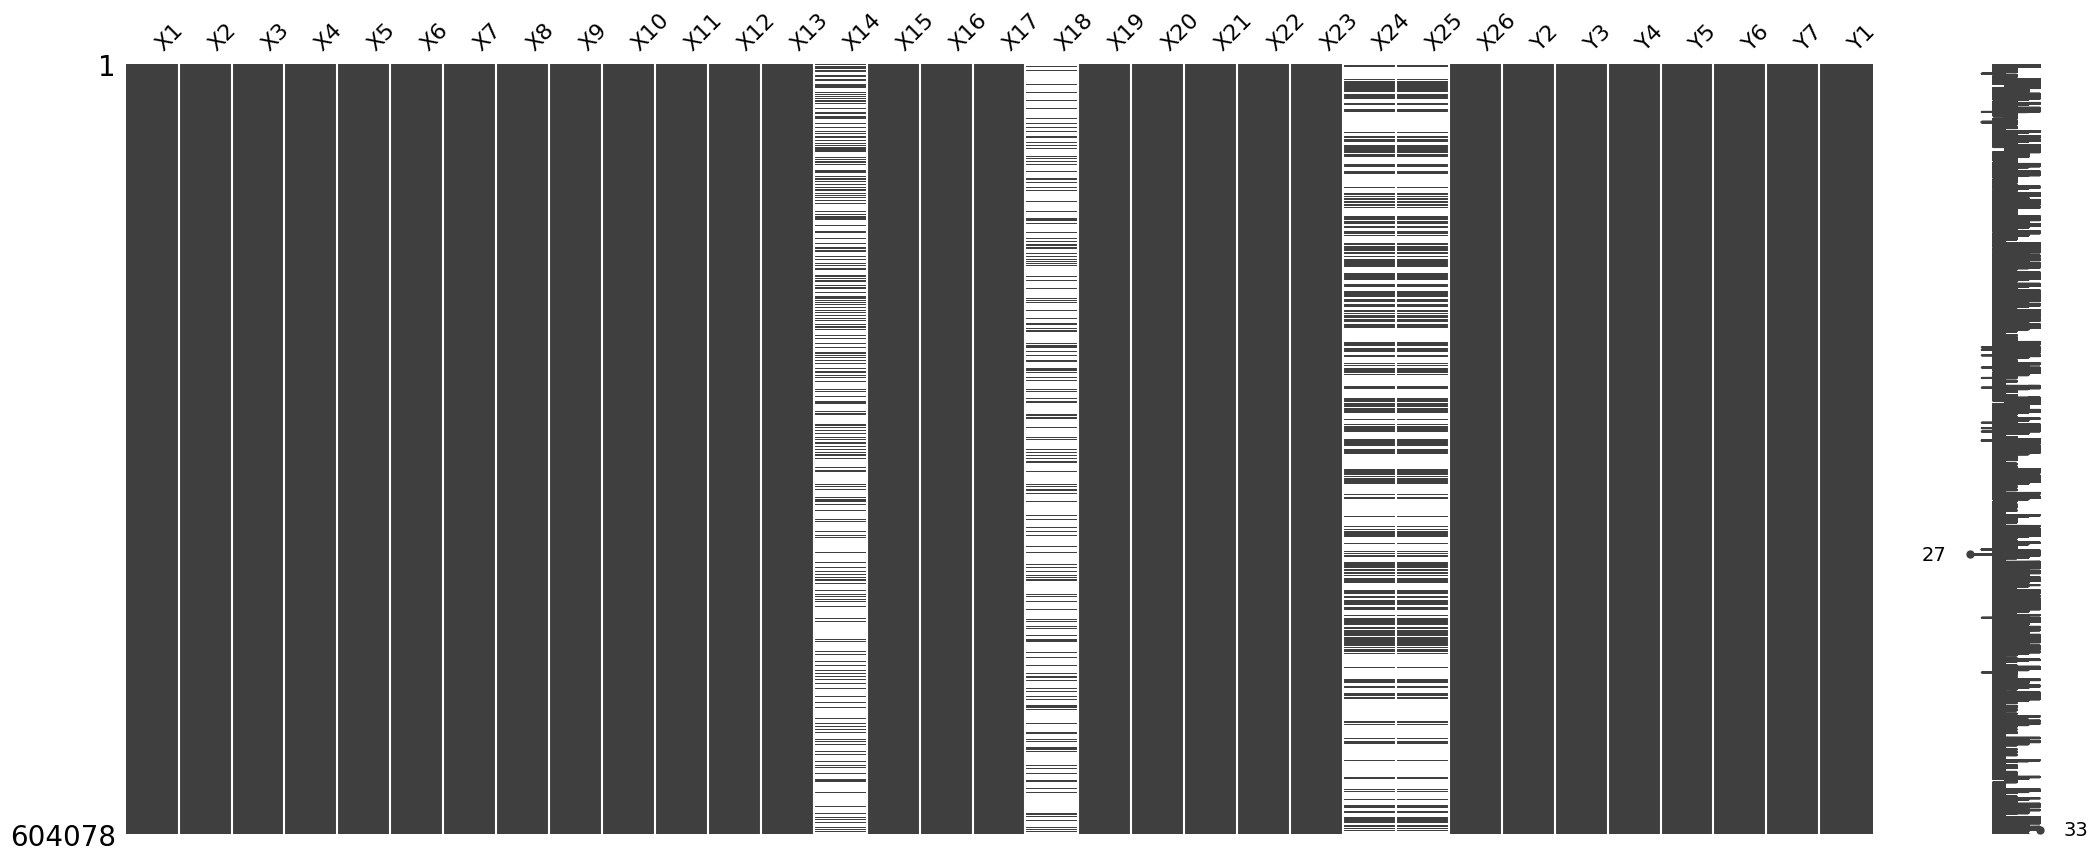

In [6]:
msno.matrix(df)

#X14, X18, X24, X25

<AxesSubplot: >

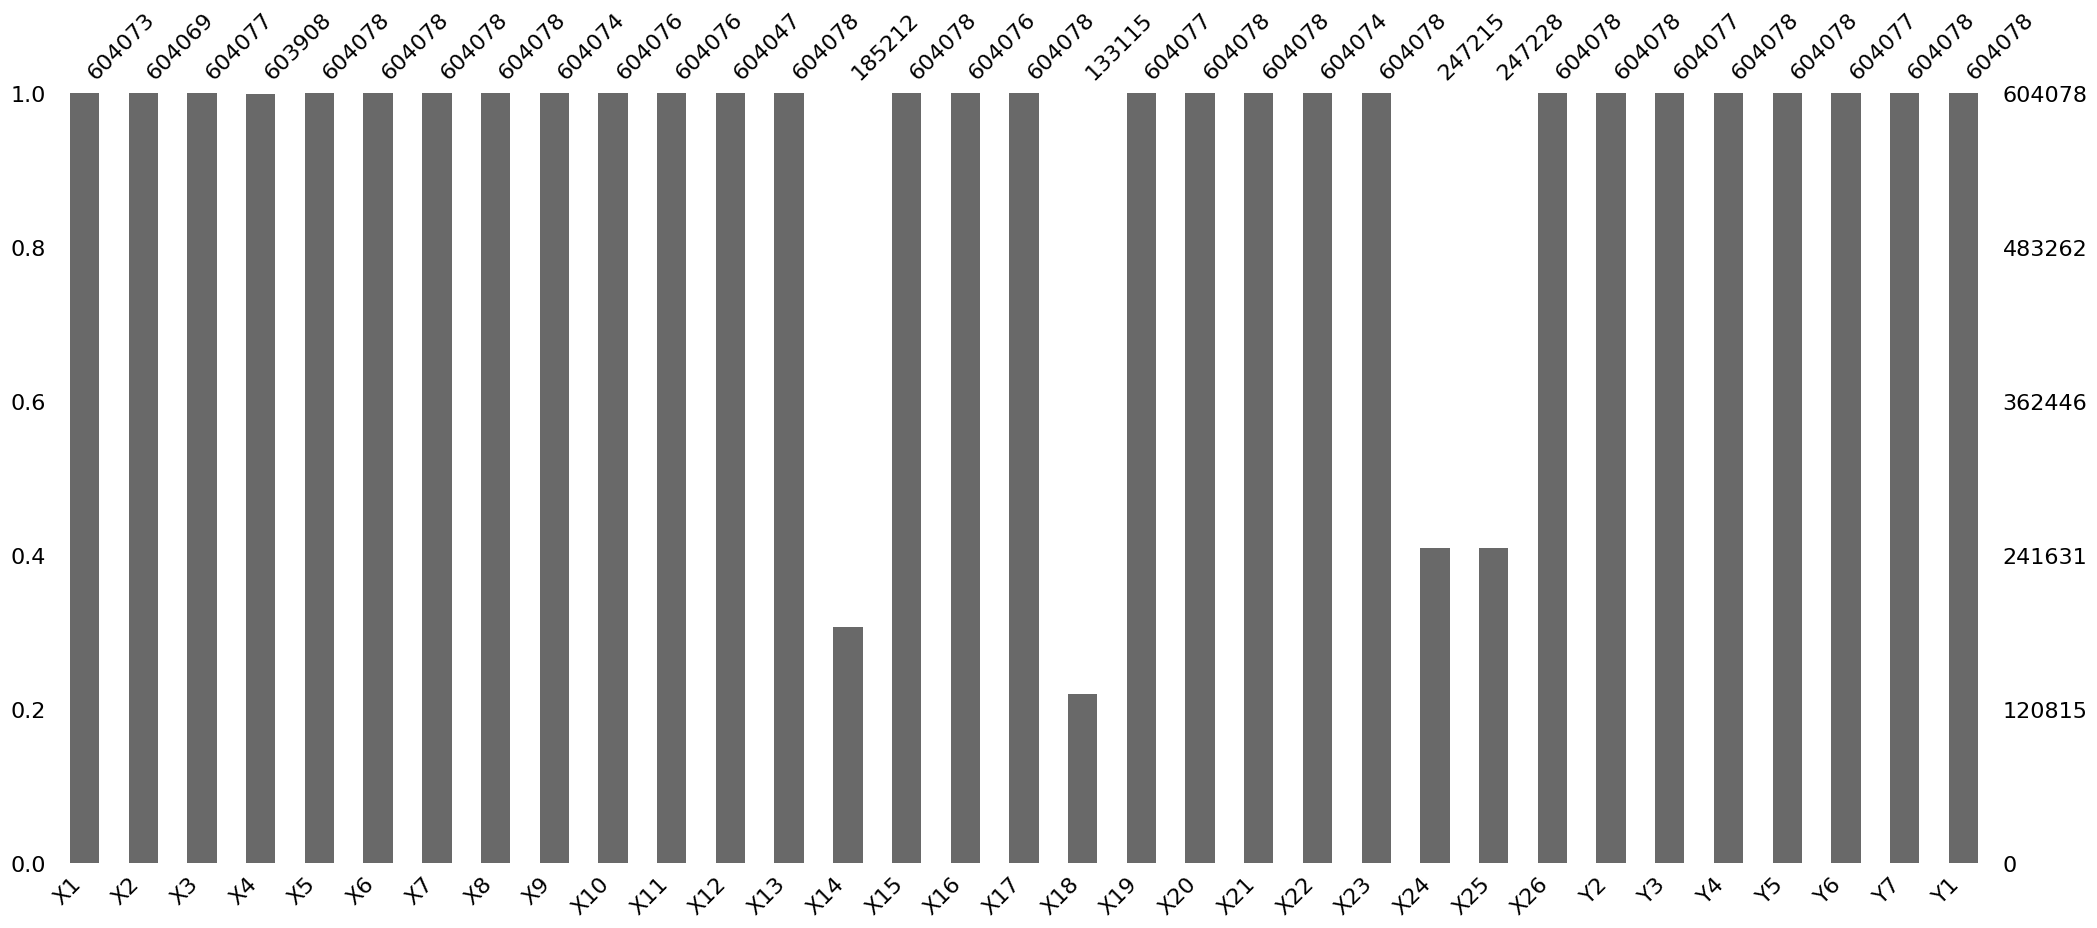

In [7]:
msno.bar(df) 

In [8]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestRegressor

In [9]:
#cols = ['X14', 'X18', 'X24','X25']
#X = df[cols]
#X

In [10]:
#imptr_it = IterativeImputer(RandomForestRegressor(), max_iter=10, random_state=0)
#impute_it = IterativeImputer()
#impute_it.fit_transform(X)


impute_it = IterativeImputer(missing_values=np.nan, sample_posterior=False, 
                                 max_iter=10, tol=0.001, 
                                 n_nearest_features=4, initial_strategy='mean')
impute_it.fit(df)
imputed_data = pd.DataFrame(data=impute_it.transform(df), dtype='int')
imputed_data

c:\Python\Lib\site-packages\sklearn\impute\_iterative.py:785: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
C:\Users\nurra\AppData\Local\Temp\ipykernel_12376\281363716.py:10: FutureWarning: In a future version, passing float-dtype values and an integer dtype to DataFrame will retain floating dtype if they cannot be cast losslessly (matching Series behavior). To retain the old behavior, use DataFrame(data).astype(dtype)
  imputed_data = pd.DataFrame(data=impute_it.transform(df), dtype='int')


,0,1,2,3,4,5,6,7,8,9,...,23,24,25,26,27,28,29,30,31,32
0,3,1,1,1,1,1,1,1,3,1,...,1,3,1,2,1,2,2,1,2,2
1,5,3,1,1,2,4,2,1,5,1,...,1,2,2,2,2,2,2,1,1,2
2,4,1,1,1,2,1,2,2,2,2,...,2,3,1,2,2,2,2,2,1,2
3,4,1,1,1,2,4,2,1,1,1,...,2,3,2,2,2,1,2,1,2,2
4,2,1,1,3,1,3,1,1,1,1,...,1,3,1,2,2,2,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
604073,3,1,1,1,1,4,1,1,1,1,...,1,3,2,2,2,2,2,2,2,2
604074,2,1,1,1,1,4,1,1,5,1,...,1,2,2,2,1,2,2,2,1,2
604075,1,2,1,1,1,3,1,1,2,1,...,1,3,1,2,2,2,2,2,1,2
604076,3,1,2,1,1,3,1,1,2,2,...,1,3,2,2,2,2,1,2,2,2


In [11]:
imputed_data.isnull().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    0
25    0
26    0
27    0
28    0
29    0
30    0
31    0
32    0
dtype: int64

<AxesSubplot: >

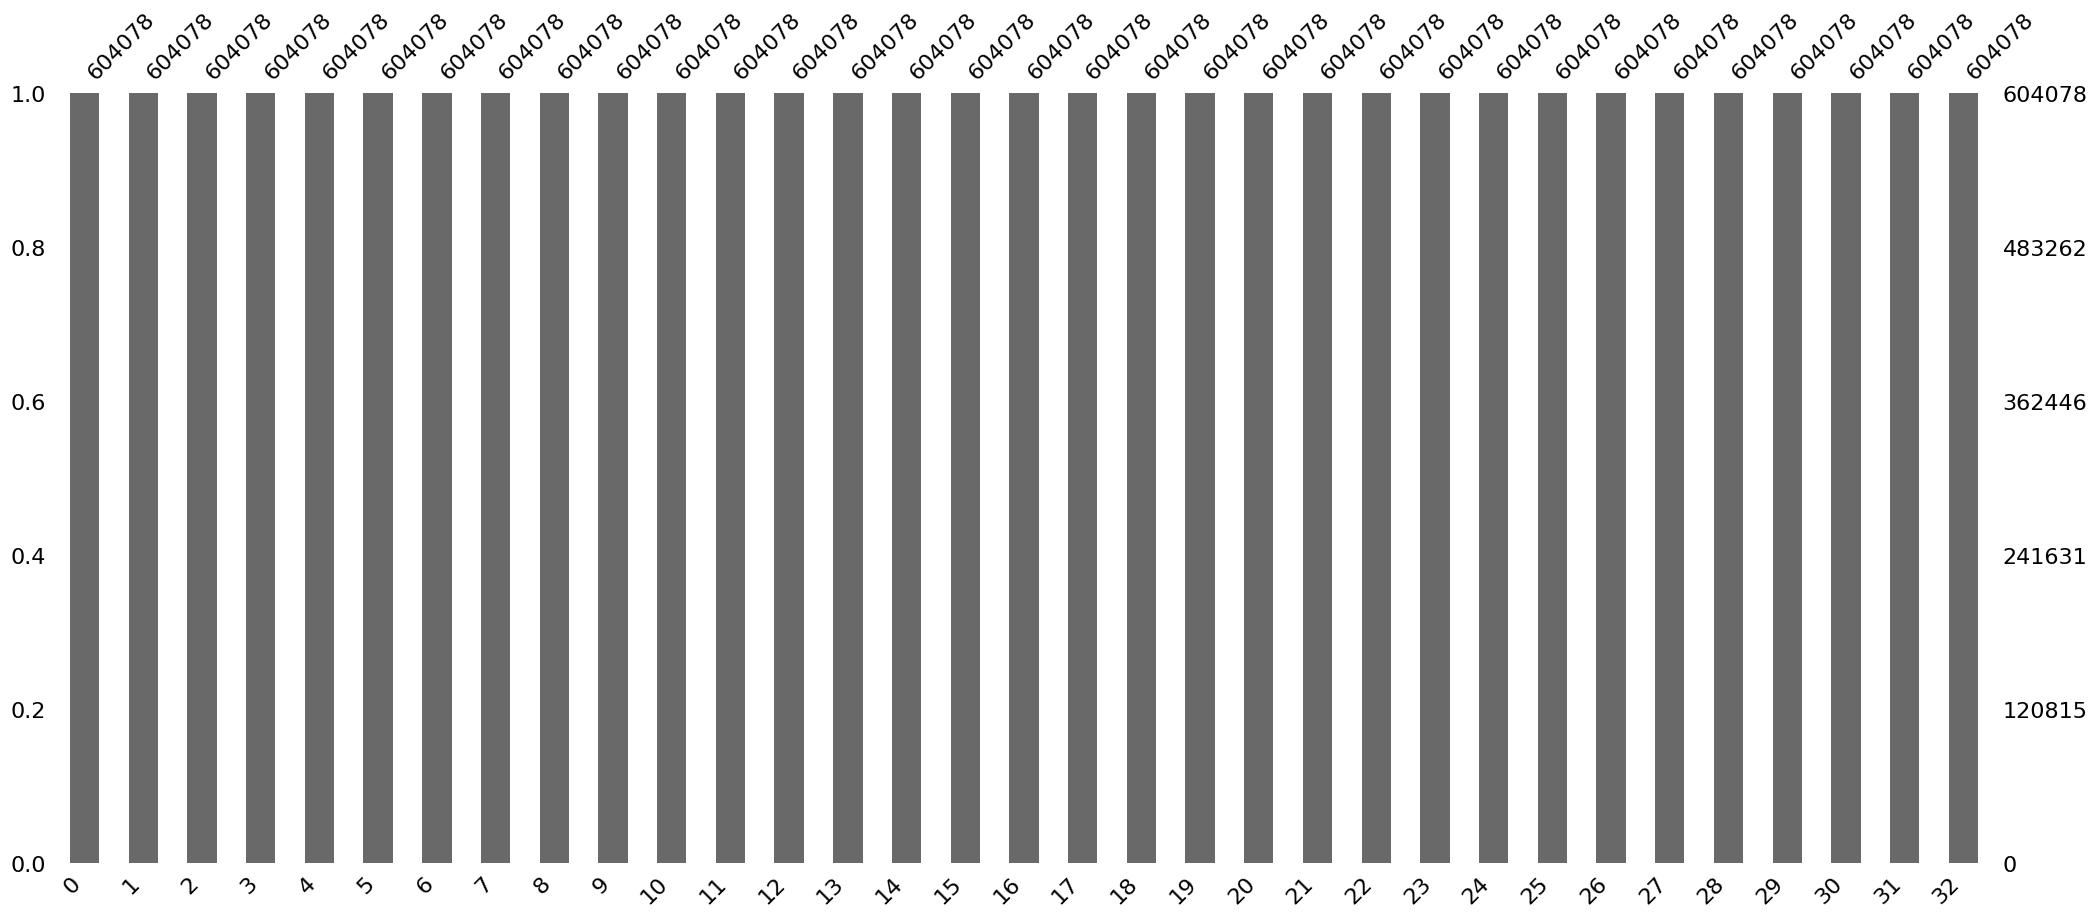

In [12]:
msno.bar(imputed_data)

In [13]:
imputed_data.head
data_clean = imputed_data
data_clean.head


<bound method NDFrame.head of         0   1   2   3   4   5   6   7   8   9   ...  23  24  25  26  27  28  \
0        3   1   1   1   1   1   1   1   3   1  ...   1   3   1   2   1   2   
1        5   3   1   1   2   4   2   1   5   1  ...   1   2   2   2   2   2   
2        4   1   1   1   2   1   2   2   2   2  ...   2   3   1   2   2   2   
3        4   1   1   1   2   4   2   1   1   1  ...   2   3   2   2   2   1   
4        2   1   1   3   1   3   1   1   1   1  ...   1   3   1   2   2   2   
...     ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ...  ..  ..  ..  ..  ..  ..   
604073   3   1   1   1   1   4   1   1   1   1  ...   1   3   2   2   2   2   
604074   2   1   1   1   1   4   1   1   5   1  ...   1   2   2   2   1   2   
604075   1   2   1   1   1   3   1   1   2   1  ...   1   3   1   2   2   2   
604076   3   1   2   1   1   3   1   1   2   2  ...   1   3   2   2   2   2   
604077   1   1   1   1   1   4   1   1   2   1  ...   1   3   2   2   2   2   

        29  30  31  3

In [14]:
data_clean.columns
df_final_all = data_clean.rename(columns = {"0": "X1","1": "X2", "2" : "X3", "3" : "X4", "4": "X5","5" : "X6", "6": "X7", "7" : "X8", "8" : "X9", "9" : "X10", "10" : "X11","11" : "X12","12" : "X13","13":"X14", "14": "X15", "15" :"X16","16" : "X17", "17" : "X18","18" :"X19", "19" : "X20","20" :"X21","21" : "X22", "22": "X23", "23" :"X24","24": "X25","25" : "X26", "32" : "Y1", "26" : "Y2", "27": "Y3","28" : "Y4","29" : "Y5", "30": "Y6", "31" : "Y7"}) 
df_final_all.head

<bound method NDFrame.head of         0   1   2   3   4   5   6   7   8   9   ...  23  24  25  26  27  28  \
0        3   1   1   1   1   1   1   1   3   1  ...   1   3   1   2   1   2   
1        5   3   1   1   2   4   2   1   5   1  ...   1   2   2   2   2   2   
2        4   1   1   1   2   1   2   2   2   2  ...   2   3   1   2   2   2   
3        4   1   1   1   2   4   2   1   1   1  ...   2   3   2   2   2   1   
4        2   1   1   3   1   3   1   1   1   1  ...   1   3   1   2   2   2   
...     ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ...  ..  ..  ..  ..  ..  ..   
604073   3   1   1   1   1   4   1   1   1   1  ...   1   3   2   2   2   2   
604074   2   1   1   1   1   4   1   1   5   1  ...   1   2   2   2   1   2   
604075   1   2   1   1   1   3   1   1   2   1  ...   1   3   1   2   2   2   
604076   3   1   2   1   1   3   1   1   2   2  ...   1   3   2   2   2   2   
604077   1   1   1   1   1   4   1   1   2   1  ...   1   3   2   2   2   2   

        29  30  31  3

In [15]:
#save on csv

df_final_all.to_csv(r'I:/My Drive/Colab Notebooks/AI_Project/2. PhD_Dzaki_BRFSS/Fix_Model_HP/1. EDNNModel/Code/csv_new.csv', index=False)
